In [21]:
# Importing libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Visualizing 6 decimals per value
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Reading data from csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

sensorama = load_dataset('sensorama_df.csv')

In [3]:
# Since odor name and canonical_smiles variables are strings, we change them to a numerical value
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['odor name'])
sensorama['odor name']=label_encoder.transform(sensorama['odor name'])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['canonical_smiles'])
sensorama['canonical_smiles']= label_encoder.transform(sensorama['canonical_smiles'])

In [4]:
# Normalizing function
def standarize(x_train):
    mean = x_train.mean()
    std = x_train.std()
    x_train -= mean
    x_train /= std

# Normalizing data
s= sensorama.columns
s=s.drop(['odor level', 'cid', 'canonical_smiles', 'odor name'])
for c in s:
    standarize(sensorama[c])
# After normalizing the data, we have NaNs values, so we change them to 0
sensorama=sensorama.fillna(0)

In [5]:
# Creating a new dataframe with only those molecules of odor level = 1
sensorama_2 = []
for i in range (0,17994):
    if sensorama.loc[i,'odor level'] == 2:
        sensorama_2.append(sensorama.loc[i,:])
sensorama_2 = pd.DataFrame(sensorama_2)

### RANDOM FOREST

In [6]:
X = sensorama_2[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_2['odor name']

Accuracy:  24.107142857142858 %


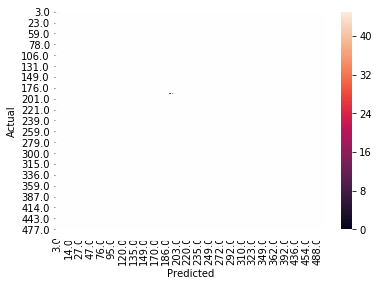

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

In [8]:
X = sensorama_2[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf',
               'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_2['odor name']

Accuracy:  26.674107142857146 %


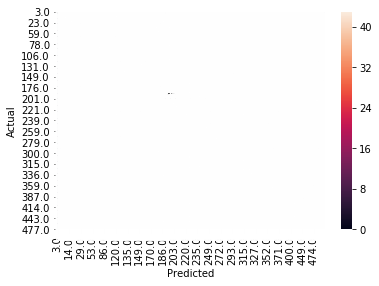

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### SUPPORT VECTOR MACHINE

In [10]:
X = sensorama_2[['canonical_smiles','xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_2['odor name']

##### rbf Kernel

In [11]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 7.2544642857142865 %


##### Polynomial Kernel

In [13]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 7.700892857142858 %


##### Sigmoid Kernel

In [14]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 4.575892857142857 %


### Decision Tree

In [15]:
X = sensorama_2[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_2['odor name']

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 88.55813953488372 %


### Logistic Regression

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  7.477678571428571 %


C:\Users\margu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### K-Nearest Neighbor

Text(0, 0.5, 'Accuracy')

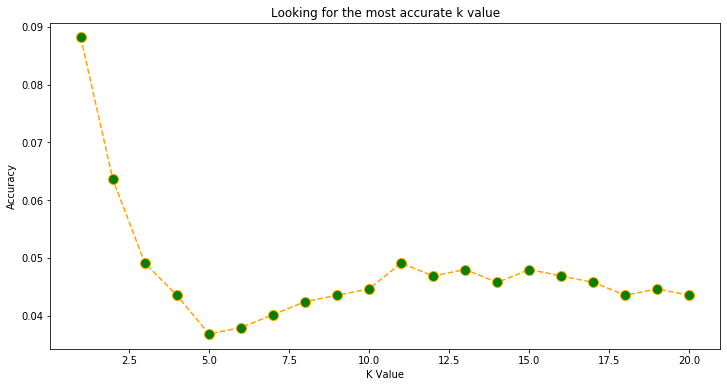

In [23]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [25]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 8.816964285714286 %
